# Project - EDA with Pandas Using the Ames Housing Data

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this more free-form project, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains housing values in the suburbs of Ames.

## Objectives

You will be able to:

* Perform a full exploratory data analysis process to gain insight about a dataset 

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file ``ames_train.csv``) 
* Use built-in Python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations like `.loc`, `.iloc`, or related operations.   Explain why you used the chosen subsets and do this for three possible 2-way splits. State how you think the two measures of centrality and/or dispersion might be different for each subset of the data.
* Next, use histograms and scatter plots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions
Look in ``data_description.txt`` for a full description of all variables.

A preview of some of the columns:

**MSZoning**: Identifies the general zoning classification of the sale.
		
       A	 Agriculture
       C	 Commercial
       FV	Floating Village Residential
       I	 Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

**OverallCond**: Rates the overall condition of the house

       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor

**KitchenQual**: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

**YrSold**: Year Sold (YYYY)

**SalePrice**: Sale price of the house in dollars

In [1]:
# Let's get started importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


pd.set_option('display.max_columns', 100)
plt.style.use('ggplot')

In [2]:
# Loading the data
df = pd.read_csv('train.csv')

In [3]:
# Investigate the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## For this exercise, I decided to work with a dataframe that has fewer columns. A LOT FEWER COLUMNS.


In [4]:
to_keep = ['MSZoning', 'OverallCond', 'KitchenQual','YrSold','SalePrice','LotArea','YearBuilt']
short_df = df.copy()
short_df = short_df[to_keep]
short_df.head()

,MSZoning,OverallCond,KitchenQual,YrSold,SalePrice,LotArea,YearBuilt
0,RL,5,Gd,2008,208500,8450,2003
1,RL,8,TA,2007,181500,9600,1976
2,RL,5,Gd,2008,223500,11250,2001
3,RL,5,Gd,2006,140000,9550,1915
4,RL,5,Gd,2008,250000,14260,2000


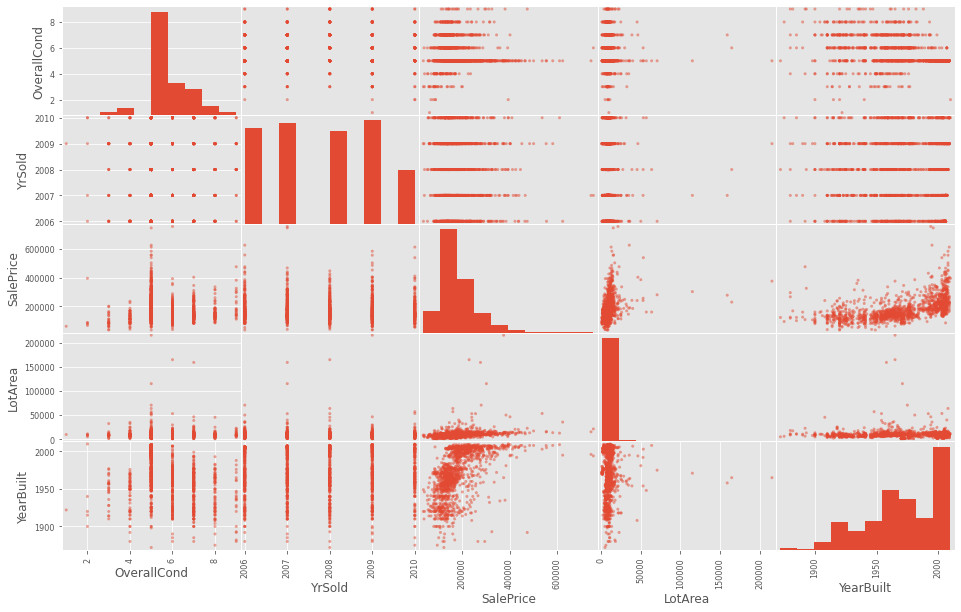

In [5]:
# Investigating Distributions using scatter_matrix

pd.plotting.scatter_matrix(short_df, figsize =(16,10));


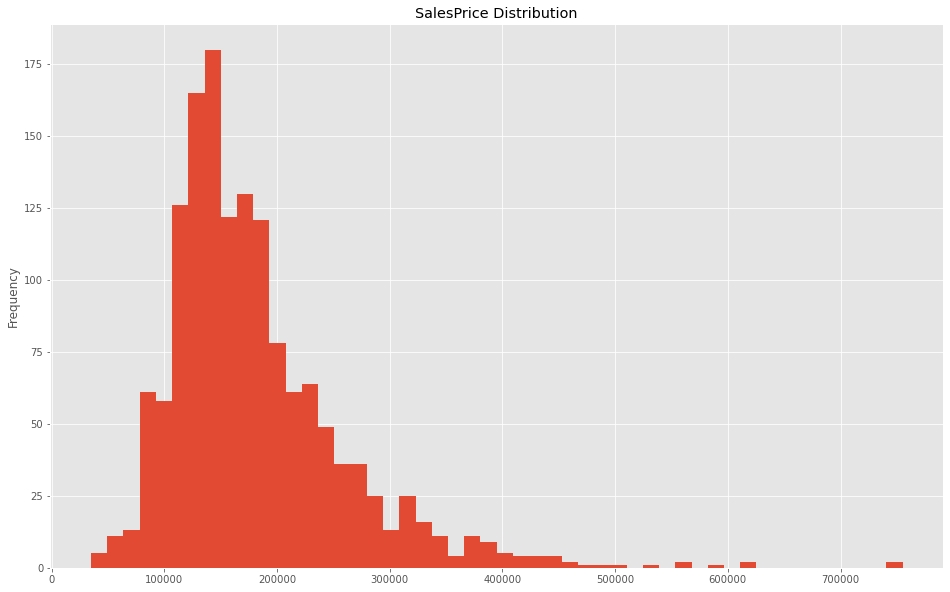

In [6]:
# Create a plot that shows the SalesPrice Distribution
short_df['SalePrice'].plot.hist(bins=50, 
                                figsize=(16,10),
                               title = 'SalesPrice Distribution');

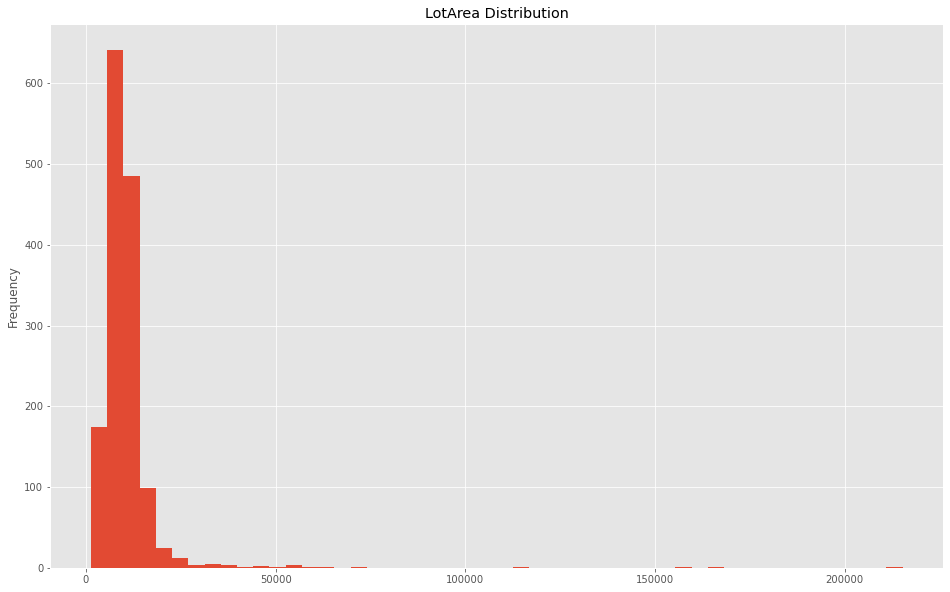

In [7]:
# Create a plot that shows the LotArea Distribution
short_df['LotArea'].plot.hist(bins=50, 
                              figsize=(16,10),
                             title = 'LotArea Distribution');

## outliers have skewed the histogram. We'll plot using the 99th percentile of the 'LotArea'

In [8]:
print(short_df['LotArea'].quantile(.99))

37567.64000000022


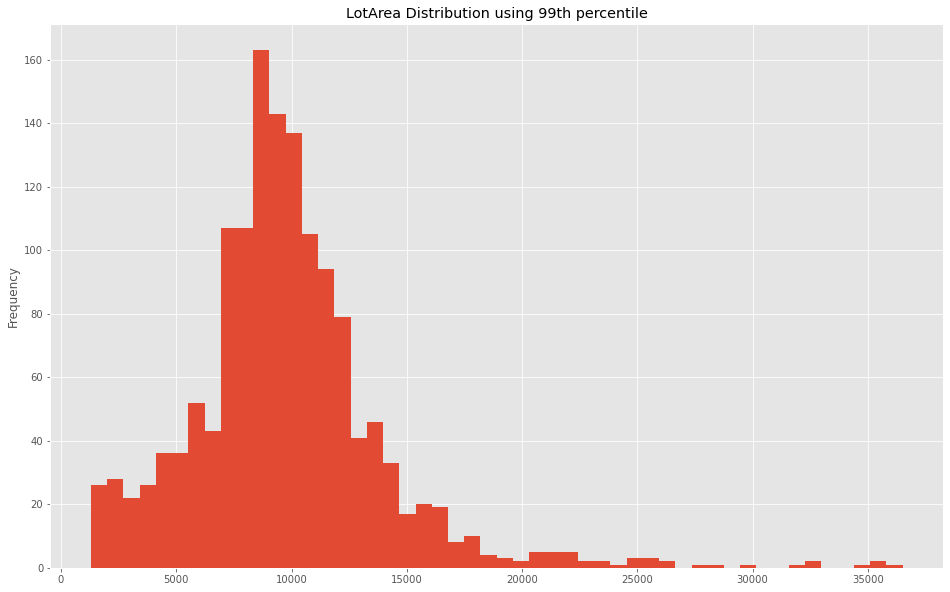

In [9]:
short_df_less = short_df.loc[short_df['LotArea'] < 37567]
short_df_less['LotArea'].plot.hist(bins=50,
                                   figsize=(16,10),
                                  title = 'LotArea Distribution using 99th percentile');

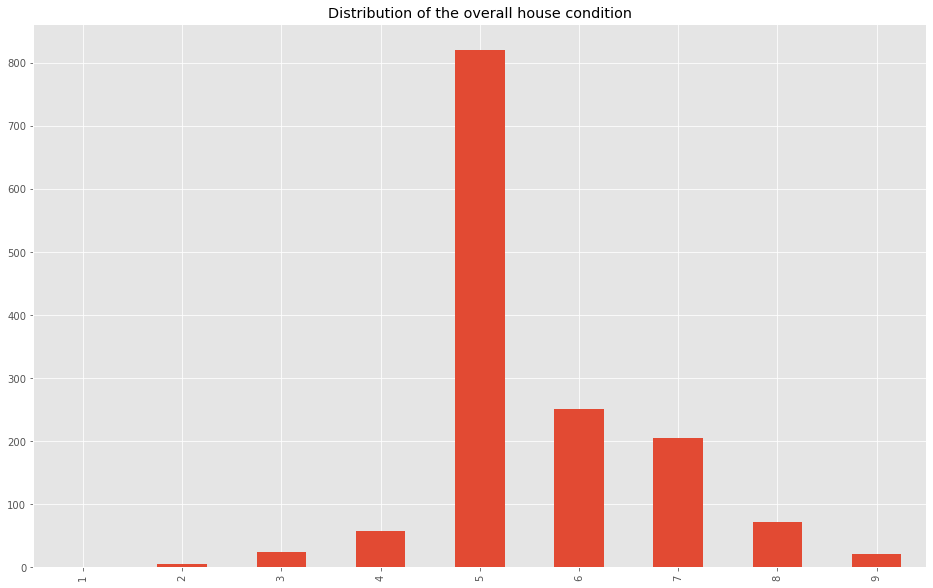

In [10]:
# Create a plot that shows the Distribution of the overall house condition

# Creating a series with the value counts of column: 'OverallCond'
cond_value_counts = short_df['OverallCond'].value_counts()

# Series need to be sorted before plot to show a nice 1-9
cond_value_counts.sort_index().plot(kind = 'bar', 
                                    figsize=(16,10),
                                   title = 'Distribution of the overall house condition');


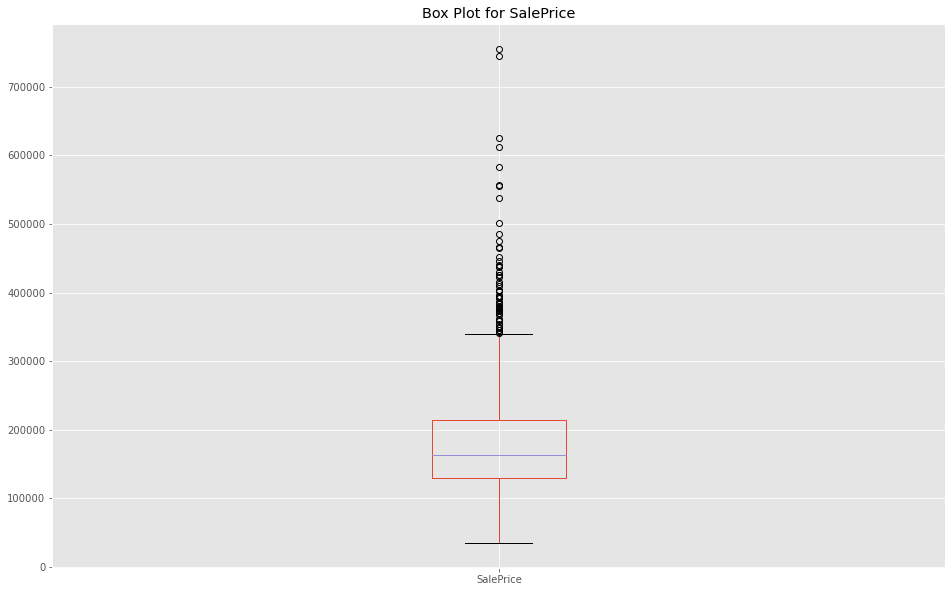

In [14]:
# Create a Box Plot for SalePrice
short_df['SalePrice'].plot.box(figsize=(16,10),
                              title = 'Box Plot for SalePrice');

In [12]:
# Perform an Exploration of home values by age

#creating a new column called 'house_age'. house_age = today's year - year built
import datetime
now = datetime.datetime.now()
now_year = now.year
year_minus = lambda x: now_year - x
short_df['house_age'] = short_df['YearBuilt'].map(year_minus)
short_df

,MSZoning,OverallCond,KitchenQual,YrSold,SalePrice,LotArea,YearBuilt,house_age
0,RL,5,Gd,2008,208500,8450,2003,17
1,RL,8,TA,2007,181500,9600,1976,44
2,RL,5,Gd,2008,223500,11250,2001,19
3,RL,5,Gd,2006,140000,9550,1915,105
4,RL,5,Gd,2008,250000,14260,2000,20
...,...,...,...,...,...,...,...,...
1455,RL,5,TA,2007,175000,7917,1999,21
1456,RL,6,TA,2010,210000,13175,1978,42
1457,RL,9,Gd,2010,266500,9042,1941,79
1458,RL,6,Gd,2010,142125,9717,1950,70


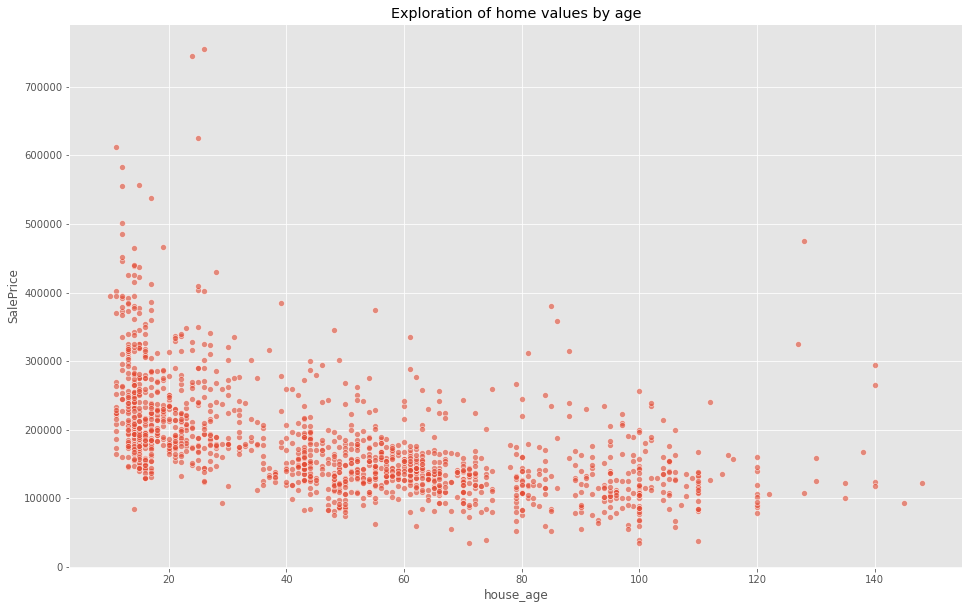

In [13]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='house_age',y='SalePrice',data=short_df, alpha = 0.6)
plt.title('Exploration of home values by age');